In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
CSV_PATH = r"C:\Users\30698\Documents\art_project\art-retrieval\data\chromadb\evaluation_results\retrieval_metrics_template.csv"
df = pd.read_csv(CSV_PATH)
df.head()

,mode,title_recall@1,title_recall@2,title_recall@3,title_recall@4,title_recall@5,title_recall@6,title_recall@7,title_recall@8,title_recall@9,...,artist_recall@2,artist_recall@3,artist_recall@4,artist_recall@5,artist_recall@6,artist_recall@7,artist_recall@8,artist_recall@9,artist_recall@10,artist_purity@10
0,text,65.3,67.2,68.1,70.7,71.8,72.5,73.3,74.2,75.0,...,77.2,79.0,80.20,81.10,81.6,81.9,82.1,82.2,82.3,0.3050
1,images,15.1,16.2,17.2,18.4,19.2,20.1,20.9,21.7,22.3,...,2.0,2.1,2.15,2.15,2.2,2.2,2.2,2.2,2.5,0.0035


In [17]:
def plot_recall_side_by_side(df, prefix="title", max_k=10, mode_col="mode"):

    modes = df[mode_col].tolist()
    ks = list(range(1, max_k + 1))
    recall_cols = [f"{prefix}_recall@{k}" for k in ks]

    vals = df[recall_cols].to_numpy() # shape: (n_modes, max_k)

    x = np.arange(len(ks))
    n_modes = len(modes)
    width = 0.8 / max(n_modes, 1)

    plt.figure(figsize=(12, 4))
    for i, mode in enumerate(modes):
        plt.bar(x + (i - (n_modes - 1)/2) * width, vals[i], width, label=mode)

    plt.xticks(x, [f"@{k}" for k in ks])
    plt.ylim(0, 100)
    plt.ylabel("Recall")
    plt.title(f"{prefix.capitalize()} Recall@K")
    plt.legend()
    plt.grid(axis="y", alpha=0.3)
    plt.show()


In [18]:
def plot_metrics_side_by_side(df, metric_cols, mode_col="mode"):

    modes = df[mode_col].tolist()

    vals = df[metric_cols].to_numpy(dtype=float)  # shape (n_modes, n_metrics)
    n_modes = len(modes)
    n_metrics = len(metric_cols)

    x = np.arange(n_metrics)
    width = 0.8 / max(n_modes, 1)

    plt.figure(figsize=(12, 4))
    for i, mode in enumerate(modes):
        plt.bar(x + (i - (n_modes - 1)/2) * width, vals[i], width, label=mode)

    plt.xticks(x, metric_cols, rotation=20, ha="right")
    plt.ylabel("Value")
    plt.title("Other metrics")
    plt.legend()
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()


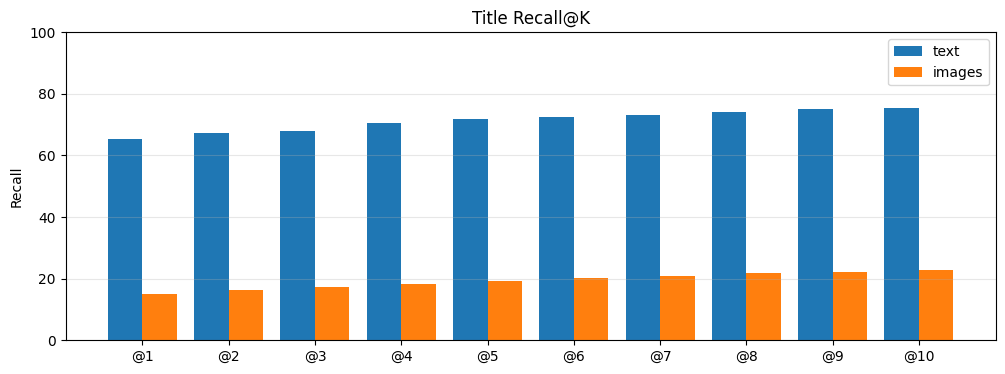

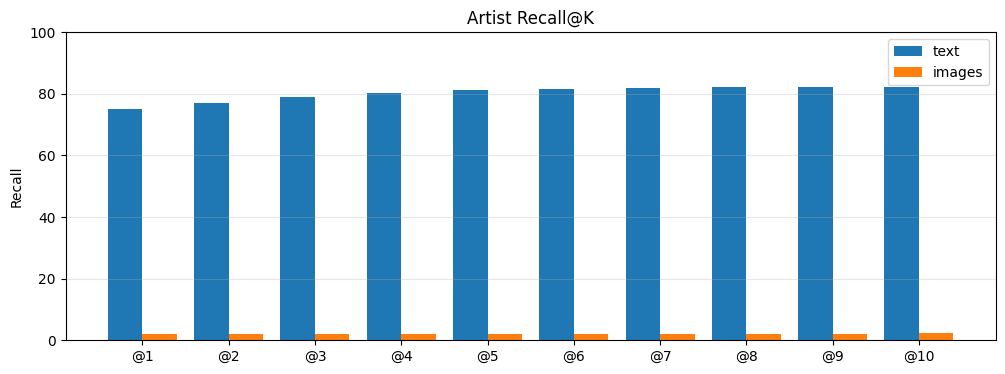

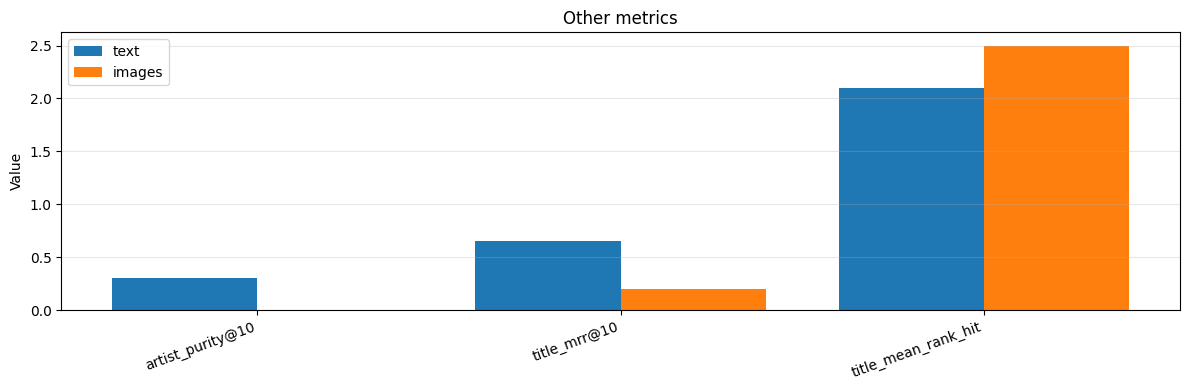

In [19]:
# Recall curves
plot_recall_side_by_side(df, prefix="title", max_k=10)
plot_recall_side_by_side(df, prefix="artist", max_k=10)

# Other metrics 
plot_metrics_side_by_side(df, metric_cols=["artist_purity@10", "title_mrr@10", "title_mean_rank_hit"])
